In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#data1=pd.read_csv("gold_price_update2.csv")
import pandas as pd

df = pd.read_csv('gold_price_update2.csv', delimiter=',', header=0, index_col=False)

# convert time_date col to datetime64 dtype
df['date'] = pd.to_datetime(df['date'], utc=True)

#df.set_index('date', inplace=True)

#print(df.index.date)

In [3]:
df.head()

,date,price
0,2010-01-04 00:00:00+00:00,17500
1,2010-01-05 00:00:00+00:00,17650
2,2010-01-06 00:00:00+00:00,17600
3,2010-01-07 00:00:00+00:00,17700
4,2010-01-08 00:00:00+00:00,17600


In [4]:
data=pd.concat([df])
data=data.sort_values(by='date', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [5]:
data.dtypes


date     datetime64[ns, UTC]
price                  int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 0 to 3896
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    3897 non-null   datetime64[ns, UTC]
 1   price   3897 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 91.3 KB


In [7]:
data.describe()

,price
count,3897.000000
mean,22023.017706
std,3610.901576
min,16750.000000
25%,19350.000000
50%,20400.000000
75%,24750.000000
max,31700.000000


### Check for normality in data

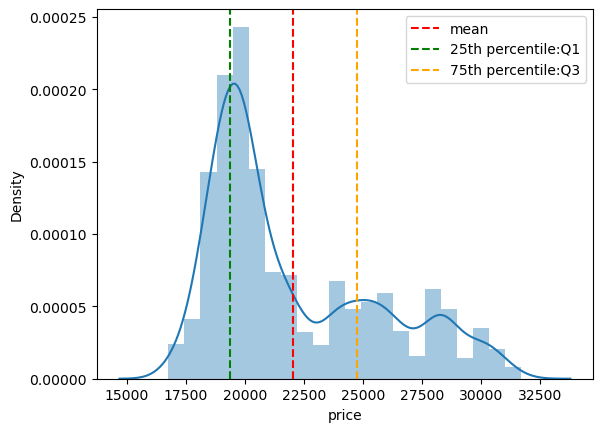

In [8]:
sns.distplot(data['price'])
plt.axvline(x=np.mean(data['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

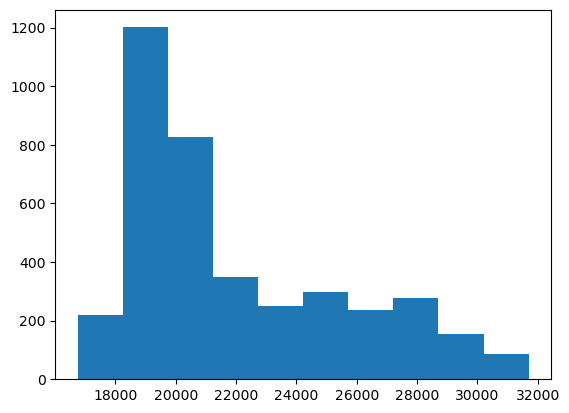

In [9]:
plt.hist(data["price"])
plt.show()

### Find Outliers in data

<AxesSubplot: >

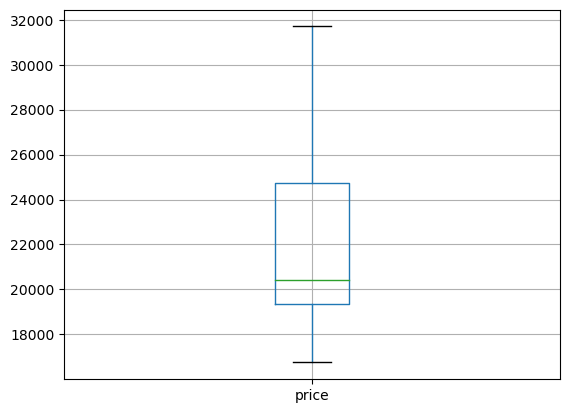

In [10]:
data.boxplot(column=["price"])

### Check Trend in data

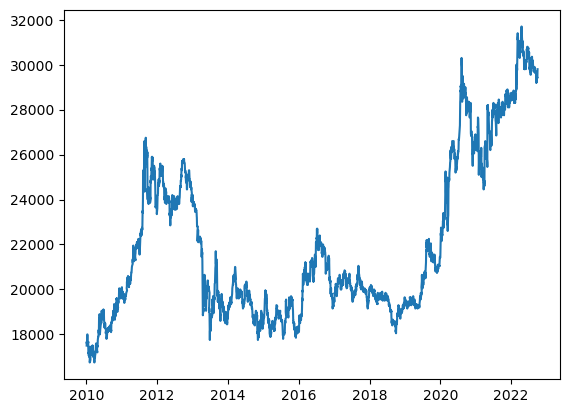

In [11]:
df = pd.read_csv('gold_price_update2.csv', parse_dates = ['date'], index_col = ['date'])

plt.plot(df)
